In [1]:
import copy
import rdkit
from rdkit import Chem
#from rdkit.Chem import Fraggle
#from rdkit.Chem.Fraggle import FraggleSim
#from rdkit.Chem.Fraggle.FraggleSim import GetFraggleSimilarity
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import Recap,BRICS
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import display
from rdkit import DataStructs

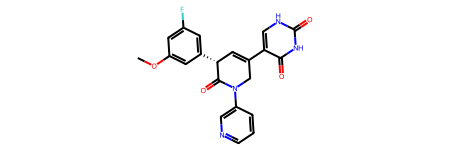

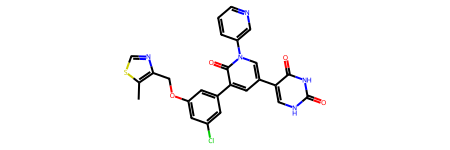

In [2]:
#mol03 = Chem.SDMolSupplier('M03.sdf')
#mol13 = Chem.SDMolSupplier('M13.sdf')

mol03 = Chem.MolFromSmiles("O=c1c(C2=C[C@H](C(=O)N(C2)c2cnccc2)c2cc(F)cc(OC)c2)c[nH]c(=O)[nH]1")
mol13 = Chem.MolFromSmiles("c1sc(c(n1)COc1cc(Cl)cc(c1)c1cc(c2c[nH]c(=O)[nH]c2=O)cn(c1=O)c1cnccc1)C")

molecules = [mol03, mol13]

for mol in molecules:
    display(mol)


Trying stuff with BRICS

In [3]:
# generate dummy atom
du = Chem.MolFromSmiles('*')

all_smiles = []
all_smiles.clear()

## fragmenting using BRICSDecompose
for mol in molecules:
    frags = list(Chem.BRICS.BRICSDecompose(mol, minFragmentSize=6, keepNonLeafNodes=True, returnMols=False))
    ##if returnMols = False
    mols = [Chem.MolFromSmiles(x) for x in frags]
    ## replace dummy atoms with hydrogens
    molh = [AllChem.ReplaceSubstructs(x,du,Chem.MolFromSmiles('[H]'), True)[0] for x in mols]
    ## convert mols to smiles
    all_smiles.append([Chem.MolToSmiles(x) for x in molh])

#Draw.MolsToGridImage(molh, molsPerRow=4, subImgSize=(200, 200))
#all_smiles

[13:27:11] WARNING: not removing hydrogen atom without neighbors
[13:27:11] WARNING: not removing hydrogen atom without neighbors
[13:27:11] WARNING: not removing hydrogen atom without neighbors
[13:27:11] WARNING: not removing hydrogen atom without neighbors
[13:27:11] WARNING: not removing hydrogen atom without neighbors
[13:27:11] WARNING: not removing hydrogen atom without neighbors
[13:27:11] WARNING: not removing hydrogen atom without neighbors
[13:27:11] WARNING: not removing hydrogen atom without neighbors
[13:27:11] WARNING: not removing hydrogen atom without neighbors
[13:27:11] WARNING: not removing hydrogen atom without neighbors
[13:27:11] WARNING: not removing hydrogen atom without neighbors
[13:27:11] WARNING: not removing hydrogen atom without neighbors
[13:27:11] WARNING: not removing hydrogen atom without neighbors
[13:27:11] WARNING: not removing hydrogen atom without neighbors
[13:27:11] WARNING: not removing hydrogen atom without neighbors
[13:27:11] WARNING: not r

In [4]:
#Fraggle similarity between two molecules
#for i in all_smiles:
#    for smi in i:
#        query = Chem.MolFromSmiles(smi)
#        ref = Chem.MolFromSmiles(i[3])
#        sim, match = GetFraggleSimilarity(query, ref)
#        print(sim)
#        display(match)

In [5]:
## Tanimoto similarity

#for i in all_smiles:
#    for smi in i:
#        query = Chem.MolFromSmiles(smi)
#        ref = Chem.MolFromSmiles(i[3])
#        fp_q = Chem.RDKFingerprint(query)
#        fp_r = Chem.RDKFingerprint(ref)
#        sim = DataStructs.TanimotoSimilarity(fp_r,fp_q)
#        print(round(sim,1))

In [6]:
## Dice similarity

#for i in all_smiles:
#    for smi in i:
#        query = Chem.MolFromSmiles(smi)
#        ref = Chem.MolFromSmiles(i[3])
#        fp_q = Chem.RDKFingerprint(query)
#        fp_r = Chem.RDKFingerprint(ref)
#        sim = DataStructs.DiceSimilarity(fp_r,fp_q)
#        print(round(sim,1))

In [7]:
#for i in all_smiles:
#    print(i)
#    for smi in sorted(i):
#        tmp_mol = Chem.MolFromSmiles(smi)
#        #print(smi)
#        print(tmp_mol.GetNumAtoms())

In [11]:
## save fragemnets using similarity as a filter
## tanimoto similarity cut-off  = 0.35
## Dice threshold = 0.45
## the cut-offs are somewhat arbitrary for now.
x = 0
y = 0

cutoff = 0.5
##  all_smiles is a list of list so, need to use a nested loop
for i in all_smiles:
    for smi in i:
        mol   = Chem.MolFromSmiles(smi)
        mol   = Chem.AddHs(mol)
        query = mol
        ref   = molecules[all_smiles.index(i)]
        ##print(all_smiles.index(i))
        fp_q  = Chem.RDKFingerprint(query)
        fp_r  = Chem.RDKFingerprint(ref)
        sim   = DataStructs.TanimotoSimilarity(fp_r,fp_q)
        if round(sim,1) > cutoff:
        ## save 2D sdf file
            sdfFile2d = open('tmp/tmp_' +str(y) + '_' +str(x) + '.sdf', 'w')
            writer = Chem.SDWriter(sdfFile2d)
            writer.write(mol)
           #sdfFile2d.close()
        ## save 3d sdf file
            sdfFile3d = open('tmp/junk_' +str(y) + '_' +str(x) + '.sdf', 'w')
            confIds = Chem.AllChem.EmbedMultipleConfs(mol, 1)
            for confId in range(1):
                Chem.AllChem.UFFOptimizeMolecule(mol, confId=confId)
                writer = Chem.SDWriter(sdfFile3d)
                writer.write(mol, confId=confId) 
                #sdfFile3d.close()
            x += 1
        else:
            x += 0
    y +=1
    x = 0

In [8]:
## save fragments using number of atoms as a filter
x = 0
y = 0
##  all_smiles is a list of list so, need to use a nested loop
for i in all_smiles:
    for smi in sorted(i):
        mol = Chem.MolFromSmiles(smi)
        natoms = mol.GetNumAtoms()
        mol = Chem.AddHs(mol)
        if natoms > 15:
        ## save 2D sdf file
            sdfFile2d = open('tmp/tmp_' +str(y) + '_' +str(x) + '.sdf', 'w')
            writer = Chem.SDWriter(sdfFile2d)
            writer.write(mol)
            x += 1
        else:
            x += 0
    y +=1
    x = 0
#    sdfFile2d.close()
        #x += 1
        
        ## save 3D sdf file
#        sdfFile3d = open('junk_brics.sdf', 'a')
#        confIds = Chem.AllChem.EmbedMultipleConfs(mol, 1)
#        for confId in range(1):
#            Chem.AllChem.UFFOptimizeMolecule(mol, confId=confId)
#            writer = Chem.SDWriter(sdfFile3d)
#            writer.write(mol, confId=confId) 
#            sdfFile3d.close()